# Day 8: Working With Data in Pandas

In Day 6, we learned how to open, view, change and save dataframes. Today we are going to do more data manipulation. 

## Goals for the day:

- Do simple math and string manipulation
- Work with dictionaries and Pandas
- Combine data and work with multiple tables: `merge`, `concatenate`, `append`
- Apply functions to and get stats out of data: `map`, `apply`, `applymap`
- Analyze data using groupby
- Create pivot tables

## Functions Learned:
- Overview of the data: `describe()`
- Add a prefix or suffix to column names: `add_prefix()` or `add_suffix()`
- Translate or map values to other values using dictionaries: `map`
- Apply a function on a series or a dataframe: `apply`
- Apply a function to all the cells in a dataframe: `applymap`
- Merge tables from two data sets: `pd.merge`
- Combine dataframes with columns with the same names but no data similarity: `concat`



In [1]:
##always start by importing your python libraries

#this line will make it so that when we make plots they show up in this notbook
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

#the usual 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

## 0. Set directory

In [2]:
#this is the specific directory where the data we want to use is stored
datadirectory = '../data/'

#this is the directory where we want to store the data we finish analyzing
data_out_directory='../output/'

## 8. Basic Math with a dataframe

Remeber the math you learned with numpy, you can do all of that with entire dataframes or specific columns.

In [3]:
## load in your pokemon dataset but only keep the Name, HP,Attack, Defense columns
pokemon=pd.read_csv(datadirectory+'Pokemon.csv', usecols=['Number','Name','HP','Attack','Defense'])
pokemon.head()

,Number,Name,HP,Attack,Defense
0,1,Bulbasaur,45,49,49
1,2,Ivysaur,60,62,63
2,3,Venusaur,80,82,83
3,3,VenusaurMega Venusaur,80,100,123
4,4,Charmander,39,52,43


In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Number   800 non-null    int64 
 1   Name     800 non-null    object
 2   HP       800 non-null    int64 
 3   Attack   800 non-null    int64 
 4   Defense  800 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 31.4+ KB


## 8.1 Simple stats

In [5]:
# we can also get info on how much data we have by calling .shape
#this returns a tuple with the dimensions of the dataframe
#.shape comes from np.shape(something)

pokemon.shape

(800, 5)

In [6]:
### we can run describe and get an overview of the data
pokemon.describe([.1,.6,.9])

,Number,HP,Attack,Defense
count,800.000000,800.000000,800.000000,800.000000
mean,362.813750,69.258750,79.001250,73.842500
std,208.343798,25.534669,32.457366,31.183501
min,1.000000,1.000000,5.000000,5.000000
10%,73.900000,40.000000,40.000000,40.000000
50%,364.500000,65.000000,75.000000,70.000000
60%,431.400000,71.000000,85.000000,77.000000
90%,651.100000,100.000000,125.000000,115.000000
max,721.000000,255.000000,190.000000,230.000000


In [7]:
### mean, then select HP
##we can also use numpy, on the entire dataframe np.mean(df)
pokemon.mean()

Number     362.81375
HP          69.25875
Attack      79.00125
Defense     73.84250
dtype: float64

In [8]:
#mean of one column df.mean[column]
pokemon.mean()

Number     362.81375
HP          69.25875
Attack      79.00125
Defense     73.84250
dtype: float64

In [9]:
##std or np.std(df[column])
pokemon.std()

Number     208.343798
HP          25.534669
Attack      32.457366
Defense     31.183501
dtype: float64

In [10]:
## get unique values with len and numpy
## or len(pokemon.Number.unique())

print (np.unique(pokemon['Number']))

print (len(np.unique(pokemon['Number'])))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

## 8.2 Math with entire rows or columns

In [11]:
pokemon.head()

,Number,Name,HP,Attack,Defense
0,1,Bulbasaur,45,49,49
1,2,Ivysaur,60,62,63
2,3,Venusaur,80,82,83
3,3,VenusaurMega Venusaur,80,100,123
4,4,Charmander,39,52,43


In [12]:
### make a total column by adding each column 
pokemon['total2']=pokemon['Name']+pokemon['Attack']
pokemon.head()
#you will encounter an error, this is because when adding columns they must have the same data type

TypeError: can only concatenate str (not "int") to str

In [13]:
### make a total column by adding each column
## both of the columns are numeric so this works 
pokemon['total']=pokemon['HP']+pokemon['Attack']
pokemon.head()

,Number,Name,HP,Attack,Defense,total
0,1,Bulbasaur,45,49,49,94
1,2,Ivysaur,60,62,63,122
2,3,Venusaur,80,82,83,162
3,3,VenusaurMega Venusaur,80,100,123,180
4,4,Charmander,39,52,43,91


In [14]:
## delete total to not complicate things
del pokemon['total']

In [15]:
pokemon.head()

,Number,Name,HP,Attack,Defense
0,1,Bulbasaur,45,49,49
1,2,Ivysaur,60,62,63
2,3,Venusaur,80,82,83
3,3,VenusaurMega Venusaur,80,100,123
4,4,Charmander,39,52,43


In [16]:
# let's add a column with the total across, axis=1 means columns
pokemon.loc[:,"Total_across"] = pokemon.sum(axis=1)
pokemon.head(5)

,Number,Name,HP,Attack,Defense,Total_across
0,1,Bulbasaur,45,49,49,144
1,2,Ivysaur,60,62,63,187
2,3,Venusaur,80,82,83,248
3,3,VenusaurMega Venusaur,80,100,123,306
4,4,Charmander,39,52,43,138


In [17]:
#let's add a row with the total down each column
## if we don't specify axis then pandas will do rows automatically
pokemon.loc["Total_down",:] = pokemon.sum()
pokemon.tail(5)

,Number,Name,HP,Attack,Defense,Total_across
796,719.0,DiancieMega Diancie,50.0,160.0,110.0,1039.0
797,720.0,HoopaHoopa Confined,80.0,110.0,60.0,970.0
798,720.0,HoopaHoopa Unbound,80.0,160.0,60.0,1020.0
799,721.0,Volcanion,80.0,110.0,120.0,1031.0
Total_down,290251.0,BulbasaurIvysaurVenusaurVenusaurMega VenusaurC...,55407.0,63201.0,59074.0,467933.0


In [18]:
## to select specif rows and columns we can combine math and .iloc or loc
pokemon['total_iloc']=pokemon.iloc[:,[3,4]].sum(axis=1)
pokemon.head()

,Number,Name,HP,Attack,Defense,Total_across,total_iloc
0,1.0,Bulbasaur,45.0,49.0,49.0,144.0,98.0
1,2.0,Ivysaur,60.0,62.0,63.0,187.0,125.0
2,3.0,Venusaur,80.0,82.0,83.0,248.0,165.0
3,3.0,VenusaurMega Venusaur,80.0,100.0,123.0,306.0,223.0
4,4.0,Charmander,39.0,52.0,43.0,138.0,95.0


In [19]:
#let's remove the new column so it doesn't confuse us later
pokemon.drop(columns=['Total_across','total_iloc'],inplace=True)
pokemon.head()

,Number,Name,HP,Attack,Defense
0,1.0,Bulbasaur,45.0,49.0,49.0
1,2.0,Ivysaur,60.0,62.0,63.0
2,3.0,Venusaur,80.0,82.0,83.0
3,3.0,VenusaurMega Venusaur,80.0,100.0,123.0
4,4.0,Charmander,39.0,52.0,43.0


## Skill Check

Print the mean and standard deviation of the 'Attack' for only the first 5 rows of the dataframe

In [20]:
### Your work here

###mean



###std



### Answer

In [21]:
### use iloc to select the rows and column you want then call mean and std
print (pokemon.iloc[0:6,[3]].mean())
print (pokemon.iloc[0:6,[3]].std())

Attack    68.166667
dtype: float64
Attack    19.43622
dtype: float64


## 9. Math discaimer


If you want to do full on calculation with dataframes then use numpy. Pandas is best suited for analyzing dataframes with some categorical column. You can create functions to analyze your df and there are some cool tricks that I will mention below but again if you want to do mathematical analyses on your tables then numpy is your go to.

## 10. String manipulation with columns
We are going to use one of my old datasets to better understand the power of pandas and string manipulations

In [22]:
### let's open up a genetics dataset
gene_info=pd.read_csv(datadirectory+'contig_information.csv')
## info to see count 
gene_info.info()
gene_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17034 entries, 0 to 17033
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CAMNT_ID           17034 non-null  object
 1   WGCNA_Module_Num   17034 non-null  int64 
 2   RAIN_diel_Results  17034 non-null  bool  
 3   KEGG_Annotations   11231 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 416.0+ KB


,CAMNT_ID,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations
0,CAMNT_0024302971,7,False,00910 Nitrogen metabolism [PATH:ko00910]
1,CAMNT_0024014877,4,False,00030 Pentose phosphate pathway [PATH:ko00030]
2,CAMNT_0024014645,9,True,00190 Oxidative phosphorylation [PATH:ko00190]
3,CAMNT_0023937169,9,True,00190 Oxidative phosphorylation [PATH:ko00190]
4,CAMNT_0024335527,9,True,00190 Oxidative phosphorylation [PATH:ko00190]


In [23]:
### let's drop the rows without values since I can't do anything with them
gene_info_clean=gene_info.dropna()
gene_info_clean.info()
gene_info_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 11881
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CAMNT_ID           11231 non-null  object
 1   WGCNA_Module_Num   11231 non-null  int64 
 2   RAIN_diel_Results  11231 non-null  bool  
 3   KEGG_Annotations   11231 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 361.9+ KB


,CAMNT_ID,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations
0,CAMNT_0024302971,7,False,00910 Nitrogen metabolism [PATH:ko00910]
1,CAMNT_0024014877,4,False,00030 Pentose phosphate pathway [PATH:ko00030]
2,CAMNT_0024014645,9,True,00190 Oxidative phosphorylation [PATH:ko00190]
3,CAMNT_0023937169,9,True,00190 Oxidative phosphorylation [PATH:ko00190]
4,CAMNT_0024335527,9,True,00190 Oxidative phosphorylation [PATH:ko00190]


A challenge that I often have in my data is messy names annotation names

-Let's clean up the Kegg annotations so I only have the actual annotation

In [24]:
#partition my string based on the delimter, in this case the space
gene_info_clean['KEGG_clean']=[i.partition(' ') for i in gene_info_clean['KEGG_Annotations']].copy()
gene_info_clean.head()

,CAMNT_ID,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations,KEGG_clean
0,CAMNT_0024302971,7,False,00910 Nitrogen metabolism [PATH:ko00910],"(00910, , Nitrogen metabolism [PATH:ko00910])"
1,CAMNT_0024014877,4,False,00030 Pentose phosphate pathway [PATH:ko00030],"(00030, , Pentose phosphate pathway [PATH:ko0..."
2,CAMNT_0024014645,9,True,00190 Oxidative phosphorylation [PATH:ko00190],"(00190, , Oxidative phosphorylation [PATH:ko0..."
3,CAMNT_0023937169,9,True,00190 Oxidative phosphorylation [PATH:ko00190],"(00190, , Oxidative phosphorylation [PATH:ko0..."
4,CAMNT_0024335527,9,True,00190 Oxidative phosphorylation [PATH:ko00190],"(00190, , Oxidative phosphorylation [PATH:ko0..."


In [25]:
# then I select the values I want from the list 
gene_info_clean['KEGG_clean1']=[i.partition(' ')[2] for i in gene_info_clean['KEGG_Annotations']].copy()
gene_info_clean.head()

,CAMNT_ID,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations,KEGG_clean,KEGG_clean1
0,CAMNT_0024302971,7,False,00910 Nitrogen metabolism [PATH:ko00910],"(00910, , Nitrogen metabolism [PATH:ko00910])",Nitrogen metabolism [PATH:ko00910]
1,CAMNT_0024014877,4,False,00030 Pentose phosphate pathway [PATH:ko00030],"(00030, , Pentose phosphate pathway [PATH:ko0...",Pentose phosphate pathway [PATH:ko00030]
2,CAMNT_0024014645,9,True,00190 Oxidative phosphorylation [PATH:ko00190],"(00190, , Oxidative phosphorylation [PATH:ko0...",Oxidative phosphorylation [PATH:ko00190]
3,CAMNT_0023937169,9,True,00190 Oxidative phosphorylation [PATH:ko00190],"(00190, , Oxidative phosphorylation [PATH:ko0...",Oxidative phosphorylation [PATH:ko00190]
4,CAMNT_0024335527,9,True,00190 Oxidative phosphorylation [PATH:ko00190],"(00190, , Oxidative phosphorylation [PATH:ko0...",Oxidative phosphorylation [PATH:ko00190]


In [26]:
#step 1, let's remove the last part of the name 
gene_info_clean['KEGG_clean']=[i.split('[')[0] for i in gene_info_clean['KEGG_clean1']]
gene_info_clean.head()

,CAMNT_ID,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations,KEGG_clean,KEGG_clean1
0,CAMNT_0024302971,7,False,00910 Nitrogen metabolism [PATH:ko00910],Nitrogen metabolism,Nitrogen metabolism [PATH:ko00910]
1,CAMNT_0024014877,4,False,00030 Pentose phosphate pathway [PATH:ko00030],Pentose phosphate pathway,Pentose phosphate pathway [PATH:ko00030]
2,CAMNT_0024014645,9,True,00190 Oxidative phosphorylation [PATH:ko00190],Oxidative phosphorylation,Oxidative phosphorylation [PATH:ko00190]
3,CAMNT_0023937169,9,True,00190 Oxidative phosphorylation [PATH:ko00190],Oxidative phosphorylation,Oxidative phosphorylation [PATH:ko00190]
4,CAMNT_0024335527,9,True,00190 Oxidative phosphorylation [PATH:ko00190],Oxidative phosphorylation,Oxidative phosphorylation [PATH:ko00190]


When cleaning up strings it is really usuful to know all the tricks there are. Here is [one website](https://www.programiz.com/python-programming/methods/string/partition) I use for my string tricks. 

Let's open up another dataset I need to work with

In [27]:
###read the contig data
gene_counts=pd.read_csv(datadirectory+'contig_counts.csv')
gene_counts.head()

,CAMNT,sm001,sm002,sm003,sm004,sm005,sm008,sm009,sm010,sm011,...,sm013,sm016,sm017,sm018,sm019,sm020,sm024,sm025,sm026,sm027
0,CAMNT_0023928115,214,376,204,347,411,237,262,198,199,...,411,394,299,277,251,411,288,221,256,230
1,CAMNT_0023928149,56,40,28,37,27,112,76,50,26,...,27,169,76,45,35,27,61,73,66,29
2,CAMNT_0023928253,30,45,11,38,38,28,16,29,23,...,38,15,9,31,16,38,21,28,11,10
3,CAMNT_0023928285,12,12,11,11,15,13,3,13,9,...,15,7,8,7,23,15,16,11,6,11
4,CAMNT_0023928443,210,215,216,266,338,286,225,231,174,...,338,523,897,316,246,338,243,263,235,134


In [28]:
### read in my data_dictionary
data_dict=pd.read_csv(datadirectory+'time_dict.csv')
data_dict

,TD,Sample,Sample2,Hours,Dark,R,R2,times
0,10pm,SM001,sm001,0,0,R1,1,2015-07-26 2200
1,2am,SM002,sm002,4,1,R2,2,2015-07-27 0200
2,6am,SM003,sm003,8,2,R3,3,2015-07-27 0600
3,10am,SM004,sm004,12,3,R4,4,2015-07-27 1000
4,2pm,SM005,sm005,16,4,R5,5,2015-07-27 1400
5,6pm,SM008,sm008,20,5,R6,6,2015-07-27 1800
6,10pm,SM009,sm009,24,6,R7,7,2015-07-27 2200
7,2am,SM010,sm010,28,7,R8,8,2015-07-28 0200
8,6am,SM011,sm011,32,8,R9,9,2015-07-28 0600
9,10am,SM012,sm012,36,9,R10,10,2015-07-28 1000


In [29]:
## make_dict
sample2_Hours_dict=dict(zip(data_dict.iloc[:,2],data_dict.iloc[:,3]))
sample2_Hours_dict

{'sm001': 0,
 'sm002': 4,
 'sm003': 8,
 'sm004': 12,
 'sm005': 16,
 'sm008': 20,
 'sm009': 24,
 'sm010': 28,
 'sm011': 32,
 'sm012': 36,
 'sm013': 40,
 'sm016': 44,
 'sm017': 48,
 'sm018': 52,
 'sm019': 56,
 'sm020': 60,
 'sm021': 64,
 'sm024': 68,
 'sm025': 72,
 'sm026': 76,
 'sm027': 80}

In [30]:
### let's rename the columns in gene_counts
gene_counts.set_index('CAMNT',inplace=True)
gene_counts.rename(columns=sample2_Hours_dict,inplace=True)
gene_counts.reset_index(inplace=True)
gene_counts.head()


,CAMNT,0,4,8,12,16,20,24,28,32,...,40,44,48,52,56,60,68,72,76,80
0,CAMNT_0023928115,214,376,204,347,411,237,262,198,199,...,411,394,299,277,251,411,288,221,256,230
1,CAMNT_0023928149,56,40,28,37,27,112,76,50,26,...,27,169,76,45,35,27,61,73,66,29
2,CAMNT_0023928253,30,45,11,38,38,28,16,29,23,...,38,15,9,31,16,38,21,28,11,10
3,CAMNT_0023928285,12,12,11,11,15,13,3,13,9,...,15,7,8,7,23,15,16,11,6,11
4,CAMNT_0023928443,210,215,216,266,338,286,225,231,174,...,338,523,897,316,246,338,243,263,235,134


## Skill check

Make a new variable called 'my_new_genes_df' that hold the gene_count table, but this time I want the columns to have the numbers in the 'Dark' column as column labels.
Hint: you need to make a new dictionary first.

In [31]:
##### your code

###make new dictionary

###make new df with new column names


### Answer

In [32]:
## make new dictionary
hour_dark_dict=dict(zip(data_dict.Hours,data_dict.Dark))

#make new table, we don't need inplace=True since we are making a new variable
my_new_genes_df=gene_counts.rename(columns=hour_dark_dict)
my_new_genes_df.head()

,CAMNT,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,17,18,19,20
0,CAMNT_0023928115,214,376,204,347,411,237,262,198,199,...,411,394,299,277,251,411,288,221,256,230
1,CAMNT_0023928149,56,40,28,37,27,112,76,50,26,...,27,169,76,45,35,27,61,73,66,29
2,CAMNT_0023928253,30,45,11,38,38,28,16,29,23,...,38,15,9,31,16,38,21,28,11,10
3,CAMNT_0023928285,12,12,11,11,15,13,3,13,9,...,15,7,8,7,23,15,16,11,6,11
4,CAMNT_0023928443,210,215,216,266,338,286,225,231,174,...,338,523,897,316,246,338,243,263,235,134


## 10.1 Pro-tip: String manipulation with column names

In [33]:
## let use the pokemon data for this

pokemon_full=pd.read_csv(datadirectory+'Pokemon.csv')
pokemon_full.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [34]:
## let's add a prefix to the column names
pokemon_full=pokemon_full.add_prefix('{}_'.format("x"))
pokemon_full.head()

,x_Number,x_Name,x_Type 1,x_Type 2,x_Total,x_HP,x_Attack,x_Defense,x_Sp. Atk,x_Sp. Def,x_Speed,x_Generation,x_Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [35]:
## let's add a suffix to the column names
pokemon_full=pokemon_full.add_suffix('_{}'.format("y"))
pokemon_full.head()

,x_Number_y,x_Name_y,x_Type 1_y,x_Type 2_y,x_Total_y,x_HP_y,x_Attack_y,x_Defense_y,x_Sp. Atk_y,x_Sp. Def_y,x_Speed_y,x_Generation_y,x_Legendary_y
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [36]:
##let's change the symbol in all the column names
pokemon_full.columns=pokemon_full.columns.str.replace('_','/')
pokemon_full.head()

,x/Number/y,x/Name/y,x/Type 1/y,x/Type 2/y,x/Total/y,x/HP/y,x/Attack/y,x/Defense/y,x/Sp. Atk/y,x/Sp. Def/y,x/Speed/y,x/Generation/y,x/Legendary/y
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Any string manipulation you can do on a list, you can do on a str column. More info here [link text](https://docs.python.org/2/library/string.html)

## 11. Map, Apply, Applymap --- Skip during class--But please review

You can make dictionaries by combining the infor in two columns.

In [37]:
## open the dataset again
pokemon_full2=pd.read_csv(datadirectory+'Pokemon.csv')

## 11.1 map

map is a series method, works on columns, allows us to translate or map values to other values using dictionaries

In [38]:
#let's pretend our data doesn't already have type and make a column with type based on the name

pokemon_full2['Legend_bool']=pokemon_full2['Legendary'].map({False:0,True:1})
pokemon_full2.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Legend_bool
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0


## 11.2 apply

apply is both a series and a dataframe method, we can use it to apply a function on a series or a dataframe

In [39]:
## pass apply to a str series
pokemon_full2['name_length']=pokemon_full2['Name'].apply(len)
pokemon_full2.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Legend_bool,name_length
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0,10


In [40]:
## pass apply to a numerical series
#let's make a bad column for our example
pokemon_full2['total_bad']=pokemon_full2['Total']+0.7
#let's fix it uring np.round
pokemon_full2['total_rounded']=pokemon_full2['total_bad'].apply(np.around)
pokemon_full2.head()
## you can pass any function to apply

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Legend_bool,name_length,total_bad,total_rounded
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0,9,318.7,319.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0,7,405.7,406.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0,8,525.7,526.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0,21,625.7,626.0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0,10,309.7,310.0


In [41]:
### let's use apply on the dataframe

#this will run the function in apply, (in this case max), along the specified axis (in this case rows) and 
#give us the max value for each column we selected 
pokemon_full2.loc[:,'Total':'Defense'].apply(max,axis=0)

Total      780
HP         255
Attack     190
Defense    230
dtype: int64

## 11.3 applymap

applymap applies a function to all the elements in a dataframe, (all the cells)

In [42]:
def check_data_type(some_cell):
    if type(some_cell)==str:
        return 'chicken'
    else:
        return 'beef'

check_data_type('Y')


'chicken'

In [43]:
pokemon_full2.applymap(check_data_type)

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Legend_bool,name_length,total_bad,total_rounded
0,beef,chicken,chicken,chicken,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef
1,beef,chicken,chicken,chicken,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef
2,beef,chicken,chicken,chicken,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef
3,beef,chicken,chicken,chicken,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef
4,beef,chicken,chicken,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,beef,chicken,chicken,chicken,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef
796,beef,chicken,chicken,chicken,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef
797,beef,chicken,chicken,chicken,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef
798,beef,chicken,chicken,chicken,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef,beef


## 12. Working with multiple tables

## 12.1 Merge

Imagine working with multiple datasets and having to combine tables.  Let's merge table 1 and 2. Merge requires that our dataframes have a column that is the same. More details on merge [here](https://https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). 

In [44]:
#pd.merge(left,right,on,how)
contig_full=pd.merge(gene_info_clean,gene_counts,left_on='CAMNT_ID',right_on='CAMNT',how='outer')
print (contig_full.shape)
contig_full.head()

(17031, 27)


,CAMNT_ID,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations,KEGG_clean,KEGG_clean1,CAMNT,0,4,8,...,40,44,48,52,56,60,68,72,76,80
0,CAMNT_0024302971,7.0,False,00910 Nitrogen metabolism [PATH:ko00910],Nitrogen metabolism,Nitrogen metabolism [PATH:ko00910],CAMNT_0024302971,19,36,14,...,14,34,23,15,11,14,10,20,14,13
1,CAMNT_0024014877,4.0,False,00030 Pentose phosphate pathway [PATH:ko00030],Pentose phosphate pathway,Pentose phosphate pathway [PATH:ko00030],CAMNT_0024014877,26,48,46,...,35,30,10,26,42,35,34,45,19,26
2,CAMNT_0024014877,4.0,False,00710 Carbon fixation in photosynthetic organi...,Carbon fixation in photosynthetic organisms,Carbon fixation in photosynthetic organisms [P...,CAMNT_0024014877,26,48,46,...,35,30,10,26,42,35,34,45,19,26
3,CAMNT_0024014877,4.0,False,01051 Biosynthesis of ansamycins [PATH:ko01051],Biosynthesis of ansamycins,Biosynthesis of ansamycins [PATH:ko01051],CAMNT_0024014877,26,48,46,...,35,30,10,26,42,35,34,45,19,26
4,CAMNT_0024014877,4.0,False,01200 Carbon metabolism [PATH:ko01200],Carbon metabolism,Carbon metabolism [PATH:ko01200],CAMNT_0024014877,26,48,46,...,35,30,10,26,42,35,34,45,19,26


Convinently, our dataframes had the 'Name' column but you can imagine the case where Name might be the index, not a column. Sure, I can reset the index to have the same name, but that's too much work.

In [45]:
#let's chage the CAMNT column in the gene_info and try again
print(gene_info_clean.columns)
gene_info_clean.rename(columns={'CAMNT_ID':'CAMNT'},inplace=True)
print(gene_info_clean.columns)

Index(['CAMNT_ID', 'WGCNA_Module_Num', 'RAIN_diel_Results', 'KEGG_Annotations',
       'KEGG_clean', 'KEGG_clean1'],
      dtype='object')
Index(['CAMNT', 'WGCNA_Module_Num', 'RAIN_diel_Results', 'KEGG_Annotations',
       'KEGG_clean', 'KEGG_clean1'],
      dtype='object')


In [46]:
# let's try out merge again
contig_full=pd.merge(gene_info_clean,gene_counts,on='CAMNT',how='outer')
print (contig_full.shape)
contig_full.head()

(17031, 26)


,CAMNT,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations,KEGG_clean,KEGG_clean1,0,4,8,12,...,40,44,48,52,56,60,68,72,76,80
0,CAMNT_0024302971,7.0,False,00910 Nitrogen metabolism [PATH:ko00910],Nitrogen metabolism,Nitrogen metabolism [PATH:ko00910],19,36,14,34,...,14,34,23,15,11,14,10,20,14,13
1,CAMNT_0024014877,4.0,False,00030 Pentose phosphate pathway [PATH:ko00030],Pentose phosphate pathway,Pentose phosphate pathway [PATH:ko00030],26,48,46,40,...,35,30,10,26,42,35,34,45,19,26
2,CAMNT_0024014877,4.0,False,00710 Carbon fixation in photosynthetic organi...,Carbon fixation in photosynthetic organisms,Carbon fixation in photosynthetic organisms [P...,26,48,46,40,...,35,30,10,26,42,35,34,45,19,26
3,CAMNT_0024014877,4.0,False,01051 Biosynthesis of ansamycins [PATH:ko01051],Biosynthesis of ansamycins,Biosynthesis of ansamycins [PATH:ko01051],26,48,46,40,...,35,30,10,26,42,35,34,45,19,26
4,CAMNT_0024014877,4.0,False,01200 Carbon metabolism [PATH:ko01200],Carbon metabolism,Carbon metabolism [PATH:ko01200],26,48,46,40,...,35,30,10,26,42,35,34,45,19,26


## Merge more than two dataframes

In [47]:
## let use the pokemon data for this

pokemon_full=pd.read_csv(datadirectory+'Pokemon.csv')
pokemon_full.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


At some point I'm going to have more than 2 tables that I need to combine and so there has to be a better way to merge than doing two at a time. There is this is a little advanced but I'm sharing with you because it will save you time.

In [48]:
## let's make three tables that all have one column in common that we will use to join our tables
table1=pokemon_full[['Name','Total','HP']].copy()
table2=pokemon_full[['Name','Attack','Defense']].copy()
table3=pokemon_full[['Name','Generation','Legendary']].copy()

In [49]:
#import this cool library that allows you to reduce dataframes to list and combine them
# again this is advanced but it will save you time
from functools import reduce

# create a list of the tables yoou want to combine 
my_dataframes=[table1, table2, table3]

#make a variable that will hold the new combined dataframe
#reduce(lambda df_left,df_right: pd.merge(df_left,df_right), on=[on what column to mege], the list of the columns to merge)
combined_frame=reduce(lambda df_left,df_right: pd.merge(df_left, df_right, on=['Name']), my_dataframes)

combined_frame.head()

,Name,Total,HP,Attack,Defense,Generation,Legendary
0,Bulbasaur,318,45,49,49,1,False
1,Ivysaur,405,60,62,63,1,False
2,Venusaur,525,80,82,83,1,False
3,VenusaurMega Venusaur,625,80,100,123,1,False
4,Charmander,309,39,52,43,1,False


## 12.2 Concatenate 

[Concatenate ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) allows you to combine dataframes that have columns with the same names but no data similarity.

In [50]:
## let's make tabl4 be a subset of table 1 that only has the top3 rows, 
##and table5 will have the next 3 rows of table 1, so that both table 4 and 4 have the same columns but no values in common

table4=table1.loc[0:3,]
print (table4.head())
table5=table1.loc[4:6,]
print (table5.head())


                    Name  Total  HP
0              Bulbasaur    318  45
1                Ivysaur    405  60
2               Venusaur    525  80
3  VenusaurMega Venusaur    625  80
         Name  Total  HP
4  Charmander    309  39
5  Charmeleon    405  58
6   Charizard    534  78


In [51]:
## lets concat our tables so that all the rows are in one place
my_tables45=[table4,table5]

table4n5=pd.concat(my_tables45,axis=0)
table4n5

,Name,Total,HP
0,Bulbasaur,318,45
1,Ivysaur,405,60
2,Venusaur,525,80
3,VenusaurMega Venusaur,625,80
4,Charmander,309,39
5,Charmeleon,405,58
6,Charizard,534,78


In [52]:
## let's go back to tables 1,2,3 and remove name the concat them together 
mytables123=[table1.drop(['Name'],axis=1),table2.drop(['Name'],axis=1),table3.drop(['Name'],axis=1)]

tables_all=pd.concat(mytables123,axis=1)
tables_all

,Total,HP,Attack,Defense,Generation,Legendary
0,318,45,49,49,1,False
1,405,60,62,63,1,False
2,525,80,82,83,1,False
3,625,80,100,123,1,False
4,309,39,52,43,1,False
...,...,...,...,...,...,...
795,600,50,100,150,6,True
796,700,50,160,110,6,True
797,600,80,110,60,6,True
798,680,80,160,60,6,True


## 12.3 Append

we can also append dataframes to a dataframe as long as the columns are the same

In [53]:
## make a variable for an empty frame
hold_wanted=pd.DataFrame()

#make a list of the pokemon numbers you want
pokemon_numbers=[1,4,150]

###quick function to make a a new df from the data
def make_df(num):
  data_out=pokemon.loc[pokemon['Number']==num]
  return data_out

#make a for loop that makes a df for each pokemon in the list you make
# then append each new df to the empty df 
for i in pokemon_numbers:
  a=make_df(i)
  hold_wanted=hold_wanted.append(a)

#print the df that is not populated
hold_wanted

,Number,Name,HP,Attack,Defense
0,1.0,Bulbasaur,45.0,49.0,49.0
4,4.0,Charmander,39.0,52.0,43.0
162,150.0,Mewtwo,106.0,110.0,90.0
163,150.0,MewtwoMega Mewtwo X,106.0,190.0,100.0
164,150.0,MewtwoMega Mewtwo Y,106.0,150.0,70.0


## 12.4 Pro-tip: glob ---Skip in class ----

glob allows you to read in all the files in a directory and append them together without having to read in each file

In [54]:
#import the glob library
from glob import glob

In [55]:
## tell glob to read all the files in the directory that match the names specified and 
##store all the names in one variable 
pokemon_subset=glob(datadirectory+'Pokemon_sub*.csv')
pokemon_subset

['../data/Pokemon_sub1.csv',
 '../data/Pokemon_sub2.csv',
 '../data/Pokemon_sub3.csv']

In [56]:
## using concat call in all the files in glob 
## since we are concateing our file based on the rows we call axis=rows
## if instead you wnated to concat your files with columns you could call axis='columns'
## notice the index has repeated values
subset_together=pd.concat((pd.read_csv(file) for file in pokemon_subset),axis='rows')
subset_together

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
0,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
1,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
2,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
3,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
4,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
0,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
1,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [57]:
## using concat call in all the files in glob 
## pass in ignore_index so the index values are unique
subset_together=pd.concat((pd.read_csv(file) for file in pokemon_subset),ignore_index=True)
subset_together

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
7,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
8,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
9,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


## Skill check

In [58]:
my_df1=pd.DataFrame({'names':['Gohan','Naruto','Luffy'],'color':['blue','orange','red']})
my_df2=pd.DataFrame({'names':['Gohan','Naruto','Luffy'],'power':[9000,8000,7000]})
my_df3=pd.DataFrame({'power':[9000,8000,7000],'enemy':['Cell','Sasuke','Kaido']})

combine the three tables using the method you think is best

In [59]:
#### your code


### Answer

In [60]:
###combine df1_df2
my_df12=pd.merge(my_df1,my_df2,on='names',how='outer')

## combine df12_3

my_df123=pd.merge(my_df12,my_df3,on='power',how='outer')

my_df123

,names,color,power,enemy
0,Gohan,blue,9000,Cell
1,Naruto,orange,8000,Sasuke
2,Luffy,red,7000,Kaido


In [61]:
my_combined_df=pd.merge(my_df1,my_df2,on='names')
my_combined_df_out=pd.merge(my_combined_df,my_df3,on=['power'])
my_combined_df_out

,names,color,power,enemy
0,Gohan,blue,9000,Cell
1,Naruto,orange,8000,Sasuke
2,Luffy,red,7000,Kaido


## 13. Data Analysis 

There are many ways to organize the data you have and more often than not you will have to create your own functions to see the data as you want it. However there are some built in fucntions like [pd.pivot_table ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)and [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) that you can use to organize your data. These are both complicated tools and I am only going to introduce the basics here. 
This [stackoverflow](https://stackoverflow.com/questions/34702815/pandas-group-by-and-pivot-table-difference) response has a wonder explanation of how these two are different. 

To explore data analysis and the process of data analysis I am going to walk you through a set of questions I answered for my first manuscript. This data explores gene expression patterns of a biochemically important phytoplankton called Emiliania huxleyi (Ehux). This organism makes calcium carbonate shells and so it is a key player in the global carbon cycle. Ehux is a phytoplankton meaning it uses photosynthesis for energy. For my research question I wanted to confirm that gene expression patterns of genes involved in processes related to light like photosynthesis followed the daily light cycles (diel cycles- light:dark). 

Reference: Hernández Limón, María D., Gwenn MM Hennon, Matthew J. Harke, Kyle R. Frischkorn, Sheean T. Haley, and Sonya T. Dyhrman. "Transcriptional patterns of Emiliania huxleyi in the North Pacific Subtropical Gyre reveal the daily rhythms of its metabolic potential." Environmental microbiology 22, no. 1 (2020): 381-396.

In [62]:
### recall gene_info_clean
## CAMNT is an ID for nucleotides-->gene
## WGCNA_Module_Num is the module/cluster from a clustering analysis
## RAIN_diel_Results is the output from an analysis on periodicty, so True mean a 12hr period or diel, and False means no periodicty
## KEGG_annotation are genea annotations from another analysis

gene_info_clean.head()

,CAMNT,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations,KEGG_clean,KEGG_clean1
0,CAMNT_0024302971,7,False,00910 Nitrogen metabolism [PATH:ko00910],Nitrogen metabolism,Nitrogen metabolism [PATH:ko00910]
1,CAMNT_0024014877,4,False,00030 Pentose phosphate pathway [PATH:ko00030],Pentose phosphate pathway,Pentose phosphate pathway [PATH:ko00030]
2,CAMNT_0024014645,9,True,00190 Oxidative phosphorylation [PATH:ko00190],Oxidative phosphorylation,Oxidative phosphorylation [PATH:ko00190]
3,CAMNT_0023937169,9,True,00190 Oxidative phosphorylation [PATH:ko00190],Oxidative phosphorylation,Oxidative phosphorylation [PATH:ko00190]
4,CAMNT_0024335527,9,True,00190 Oxidative phosphorylation [PATH:ko00190],Oxidative phosphorylation,Oxidative phosphorylation [PATH:ko00190]


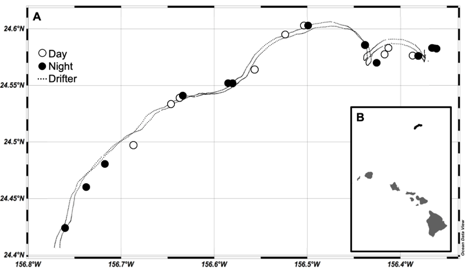

In [63]:
### counts info
## the data we are looking at was collected in the North Pacific Subtropical Gyre over a week and time samples were 
## collected every 4hrs. This was A LOT of work!!!

#so we have 21 time points over a few days

gene_counts.head()

,CAMNT,0,4,8,12,16,20,24,28,32,...,40,44,48,52,56,60,68,72,76,80
0,CAMNT_0023928115,214,376,204,347,411,237,262,198,199,...,411,394,299,277,251,411,288,221,256,230
1,CAMNT_0023928149,56,40,28,37,27,112,76,50,26,...,27,169,76,45,35,27,61,73,66,29
2,CAMNT_0023928253,30,45,11,38,38,28,16,29,23,...,38,15,9,31,16,38,21,28,11,10
3,CAMNT_0023928285,12,12,11,11,15,13,3,13,9,...,15,7,8,7,23,15,16,11,6,11
4,CAMNT_0023928443,210,215,216,266,338,286,225,231,174,...,338,523,897,316,246,338,243,263,235,134


## 13.1 coming up with questions

Possible questions:

1. What are the top 10 most abundant gene types (from the annotations) we find? How many photosynthesis genes do we find?

2. How many diel genes are there for each of these top 10 gene types?

4. Do the clusters/modules have the same type of genes in them? Are all the genes in a cluster either diel or not diel?

3. Do genes with annotations of interest show periodic patterns? even if we include the False diel? [annotations of interes: 'Photosynthesis', 'Nitrogen metabolism', 'Carbon Metabolism']

## Introduction to groupby

## Q1.
What are the top 10 most abundant gene types we find? How many photosynthesis genes do we find?

In [64]:
#@title
## how many genes per pathway
## we can use groupby to group our rows based on the KEGG_clean pathway, by how many there are
## this produces a table where all the columns have the same count
gene_info_clean.groupby('KEGG_clean').count()

,CAMNT,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations,KEGG_clean1
KEGG_clean,,,,,
2-Oxocarboxylic acid metabolism,58,58,58,58,58
ABC transporters,47,47,47,47,47
AMPK signaling pathway,42,42,42,42,42
Acute myeloid leukemia,2,2,2,2,2
Adherens junction,85,85,85,85,85
...,...,...,...,...,...
beta-Alanine metabolism,5,5,5,5,5
cGMP - PKG signaling pathway,62,62,62,62,62
mRNA surveillance pathway,55,55,55,55,55


In [65]:
## how many genes per pathway
## to only see one column we can specify what we want, in this case I want CAMNT, but any column would work
gene_info_clean.groupby('KEGG_clean').count()

,CAMNT,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations,KEGG_clean1
KEGG_clean,,,,,
2-Oxocarboxylic acid metabolism,58,58,58,58,58
ABC transporters,47,47,47,47,47
AMPK signaling pathway,42,42,42,42,42
Acute myeloid leukemia,2,2,2,2,2
Adherens junction,85,85,85,85,85
...,...,...,...,...,...
beta-Alanine metabolism,5,5,5,5,5
cGMP - PKG signaling pathway,62,62,62,62,62
mRNA surveillance pathway,55,55,55,55,55


In [66]:
## how many genes per pathway
## to see which gene type is the most abundant we can sort our values
gene_info_clean.groupby('KEGG_clean').CAMNT.count().sort_values(ascending=False)

KEGG_clean
Ribosome                                                   452
Carbon metabolism                                          313
Biosynthesis of amino acids                                297
Protein processing in endoplasmic reticulum                217
Huntington's disease                                       163
                                                          ... 
C5-Branched dibasic acid metabolism                          1
Tropane, piperidine and pyridine alkaloid biosynthesis       1
Butirosin and neomycin biosynthesis                          1
Leishmaniasis                                                1
Ubiquinone and other terpenoid-quinone biosynthesis          1
Name: CAMNT, Length: 290, dtype: int64

In [67]:
## let's make it a table so we can find things more easily
## we can create a new variable that holds the table we just made
annotation_counts=gene_info_clean.groupby('KEGG_clean').CAMNT.count().sort_values(ascending=False)
annotation_counts.head(10)

KEGG_clean
Ribosome                                        452
Carbon metabolism                               313
Biosynthesis of amino acids                     297
Protein processing in endoplasmic reticulum     217
Huntington's disease                            163
Epstein-Barr virus infection                    162
Oxidative phosphorylation                       160
Phagosome                                       155
Glycolysis / Gluconeogenesis                    151
Spliceosome                                     145
Name: CAMNT, dtype: int64

In [68]:
## let's make it a table so we can find things more easily
annotation_counts_pretty=gene_info_clean.groupby('KEGG_clean').CAMNT.count().sort_values(ascending=False).reset_index()
annotation_counts_pretty.head(10)

,KEGG_clean,CAMNT
0,Ribosome,452
1,Carbon metabolism,313
2,Biosynthesis of amino acids,297
3,Protein processing in endoplasmic reticulum,217
4,Huntington's disease,163
5,Epstein-Barr virus infection,162
6,Oxidative phosphorylation,160
7,Phagosome,155
8,Glycolysis / Gluconeogenesis,151
9,Spliceosome,145


1. What are the top 10 most abundant genes we find? How many photosynthesis genes do we find?



In [69]:
## make a list with the top 10 genes types
## since our annotations_counts table was sorted by the number of genes
## we just have to select the first 10 rows to get our answer
top10=list(annotation_counts.index[0:10])
top10

['Ribosome ',
 'Carbon metabolism ',
 'Biosynthesis of amino acids ',
 'Protein processing in endoplasmic reticulum ',
 "Huntington's disease ",
 'Epstein-Barr virus infection ',
 'Oxidative phosphorylation ',
 'Phagosome ',
 'Glycolysis / Gluconeogenesis ',
 'Spliceosome ']

## Skill check
Find how many photosynthesis genes there are, then add the name 'Photosynthesis ' to the top10 list

In [70]:
#### your code



### Answer

In [70]:
# let's add photosynthesis because we really care about it
top10.append('Photosynthesis ')
print (top10)

['Ribosome ', 'Carbon metabolism ', 'Biosynthesis of amino acids ', 'Protein processing in endoplasmic reticulum ', "Huntington's disease ", 'Epstein-Barr virus infection ', 'Oxidative phosphorylation ', 'Phagosome ', 'Glycolysis / Gluconeogenesis ', 'Spliceosome ', 'Photosynthesis ']


In [71]:
## but we still care about photosynthesis
##how many photosythesis genes
## we can use indexing to find this value
annotation_counts.loc[annotation_counts.index =='Photosynthesis ',]

KEGG_clean
Photosynthesis     71
Name: CAMNT, dtype: int64

Sweet!! we were able to leverage groupby to answer our question!

## 13.2 Introduction to pivot tables

## Q2. 

How many diel genes are there for each of these top 10 gene types?
We can use pivot table to answer this.

In [72]:
## let's see that table once again
gene_info_clean.head()

,CAMNT,WGCNA_Module_Num,RAIN_diel_Results,KEGG_Annotations,KEGG_clean,KEGG_clean1
0,CAMNT_0024302971,7,False,00910 Nitrogen metabolism [PATH:ko00910],Nitrogen metabolism,Nitrogen metabolism [PATH:ko00910]
1,CAMNT_0024014877,4,False,00030 Pentose phosphate pathway [PATH:ko00030],Pentose phosphate pathway,Pentose phosphate pathway [PATH:ko00030]
2,CAMNT_0024014645,9,True,00190 Oxidative phosphorylation [PATH:ko00190],Oxidative phosphorylation,Oxidative phosphorylation [PATH:ko00190]
3,CAMNT_0023937169,9,True,00190 Oxidative phosphorylation [PATH:ko00190],Oxidative phosphorylation,Oxidative phosphorylation [PATH:ko00190]
4,CAMNT_0024335527,9,True,00190 Oxidative phosphorylation [PATH:ko00190],Oxidative phosphorylation,Oxidative phosphorylation [PATH:ko00190]


In [73]:
## let's make a pivot table with the summary
## to make a pivot table you need to specify what you want in the index and columns and how you want to aggregare your values
## I am telling pivot_table to make me a table where my annotations ('KEGG_clean') are the index, 
## my columns are the values in RAIN_diel_Results (True or False)
## and I want the values to be aggregated by count
diel_count_genetype=gene_info_clean.pivot_table(values='CAMNT',index='KEGG_clean',columns='RAIN_diel_Results',aggfunc='count')
diel_count_genetype

RAIN_diel_Results,False,True
KEGG_clean,,
2-Oxocarboxylic acid metabolism,40.0,18.0
ABC transporters,43.0,4.0
AMPK signaling pathway,34.0,8.0
Acute myeloid leukemia,2.0,NaN
Adherens junction,65.0,20.0
...,...,...
beta-Alanine metabolism,4.0,1.0
cGMP - PKG signaling pathway,49.0,13.0
mRNA surveillance pathway,39.0,16.0


In [74]:
#to select the genes types in our top10 list we can use indexing again
diel_count_genetype.loc[diel_count_genetype.index.isin(top10),]

RAIN_diel_Results,False,True
KEGG_clean,,
Biosynthesis of amino acids,191.0,106.0
Carbon metabolism,157.0,156.0
Epstein-Barr virus infection,118.0,44.0
Glycolysis / Gluconeogenesis,83.0,68.0
Huntington's disease,121.0,42.0
Oxidative phosphorylation,96.0,64.0
Phagosome,99.0,56.0
Photosynthesis,10.0,61.0
Protein processing in endoplasmic reticulum,139.0,78.0


## Q3. 
Do the clusters/modules have the same type of genes in them? Are all the genes in a cluster either diel or not diel?

I made clusters for my genes using a program called WGCNA, you don't need to know what it is. The program gathers genes into clusters based on their expression patterns. I want to know if each cluster (called module by the program) has the same kind of genes in it? or if the clusters are a mixed of genes? But I only care about the clusters with a lot of diel genes.

## Skill check
Make a new pivot table called modules_diel that has the counts of the CAMNT. I want 'WGCNA_Module_Num' as the index and on the columns I want 'RAIN_diel_Results'

In [75]:
#### your code here

##modules_diel=




### Answer

In [76]:
## which modules have the most diel genes 
## make a new pivot tables, this time the index is the WGCNA_modules and my columns is the diel results
modules_diel=gene_info_clean.pivot_table(values='CAMNT',index='WGCNA_Module_Num',columns=['RAIN_diel_Results'],aggfunc='count')
modules_diel

RAIN_diel_Results,False,True
WGCNA_Module_Num,,
0,2239.0,28.0
1,1393.0,688.0
2,495.0,621.0
3,1110.0,943.0
4,321.0,267.0
5,327.0,12.0
6,351.0,372.0
7,154.0,1.0
8,93.0,15.0


## Continue

In [77]:
## I only care about the modules with a lot of diel genes,
## for this case let's say more than 250 diel is of interest to us
modules_diel_clean=modules_diel.loc[modules_diel[True]>250,]
modules_diel_clean

RAIN_diel_Results,False,True
WGCNA_Module_Num,,
1,1393.0,688.0
2,495.0,621.0
3,1110.0,943.0
4,321.0,267.0
6,351.0,372.0


okay so there are 5 modules with more than 250 diel==True gens, they also have a lot that are not diel but that's ok

In [78]:
##What pathways are on these modules and how many are diel

##this is a complicated run but really useufl
## I am telling pivot table to separate True/False diel, then give me how much of each annotation of each, and tell 
## me the distribution per module

modules_diel_genes=gene_info_clean.loc[((gene_info_clean['WGCNA_Module_Num'].isin(modules_diel_clean.index)) &
                                         (gene_info_clean['KEGG_clean'].isin(top10))) ,]
modules_diel_genes.pivot_table(values='CAMNT',columns='WGCNA_Module_Num',index=['RAIN_diel_Results','KEGG_clean'],aggfunc='count')

WGCNA_Module_Num                                                    1     2  \
RAIN_diel_Results KEGG_clean                                                  
False             Biosynthesis of amino acids                    14.0  21.0   
                  Carbon metabolism                              18.0  23.0   
                  Epstein-Barr virus infection                   42.0   4.0   
                  Glycolysis / Gluconeogenesis                    5.0  15.0   
                  Huntington's disease                           16.0   3.0   
                  Oxidative phosphorylation                      16.0   3.0   
                  Phagosome                                       8.0   1.0   
                  Photosynthesis                                  NaN   1.0   
                  Protein processing in endoplasmic reticulum    43.0   8.0   
                  Ribosome                                      197.0   1.0   
                  Spliceosome                                    40.0  10.0   
True              Biosynthesis of amino acids                     7.0  63.0   
                  Carbon metabolism                              14.0  68.0   
                  Epstein-Barr virus infection                   28.0   NaN   
                  Glycolysis / Gluconeogenesis                    2.0  49.0   
                  Huntington's disease                           12.0   NaN   
                  Oxidative phosphorylation                      13.0  18.0   
                  Phagosome                                      12.0   1.0   
                  Photosynthesis                                  NaN  39.0   
                  Protein processing in endoplasmic reticulum    47.0   1.0   
                  Ribosome                                       44.0  31.0   
                  Spliceosome                                    13.0   2.0   

WGCNA_Module_Num                                                   3     4  \
RAIN_diel_Results KEGG_clean                                                 
False             Biosynthesis of amino acids                   25.0  14.0   
                  Carbon metabolism                             15.0  14.0   
                  Epstein-Barr virus infection                  15.0   2.0   
                  Glycolysis / Gluconeogenesis                   8.0  10.0   
                  Huntington's disease                          28.0   2.0   
                  Oxidative phosphorylation                     18.0   6.0   
                  Phagosome                                     13.0   3.0   
                  Photosynthesis                                 NaN   1.0   
                  Protein processing in endoplasmic reticulum   15.0  11.0   
                  Ribosome                                      70.0   1.0   
                  Spliceosome                                    9.0   2.0   
True              Biosynthesis of amino acids                   22.0   6.0   
                  Carbon metabolism                             51.0  13.0   
                  Epstein-Barr virus infection                  10.0   NaN   
                  Glycolysis / Gluconeogenesis                   6.0   8.0   
                  Huntington's disease                          12.0   NaN   
                  Oxidative phosphorylation                     19.0   NaN   
                  Phagosome                                     12.0   1.0   
                  Photosynthesis                                 NaN  19.0   
                  Protein processing in endoplasmic reticulum    7.0   5.0   
                  Ribosome                                      21.0   1.0   
                  Spliceosome                                    NaN   NaN   

WGCNA_Module_Num                                                   6  
RAIN_diel_Results KEGG_clean                                          
False             Biosynthesis of amino acids                    6.0  
                 

My question: I want to know if each cluster (called module by the program) has the same kind of genes in it? or if the clusters are a mixed of genes? what are the bilogical implications?

Answer: The clusters have a mixed of gene types in them both in terms of diel type (true or false) and gene annotations (multiple pathways). The biological explanation for this is that cells are doing a little bit of the same processes throughout the day. That is they don't stop and do one process at a time.

However there are some processes that see time dependant perhaps because of their requiremnt for light. Based on these observations we can hypothesise that processes like photosynthesis and carbon metabolism are dependent on light because these pathways have more true diel than non diel genes. The majority of these genes are in module 2 which has a peak in the middle of the day. (See WGCNA_clusters.tiff in data folder) These hypotheses conincide with what we know about photosynthesis in plants. 

The fact that we observe the patterns we expected for photosynthesis and carbon metabolism validates our analysis methods. We can now explore genes whose behavior we don't know and trust what we find. 

# 13.3 Combining our skills

## Q4.

Do genes with annotations of interest show periodic patterns? even if we include the False diel? [annotations of interest: 'Photosynthesis', 'Carbon Metabolism']

In [79]:
def get_gene_wanted(some_pathway):
    """This fucntion makes a plot of the pathway we choose"""

    ### find contigs with these annotations
    genes_wanted=gene_info_clean.loc[gene_info_clean['KEGG_clean']==some_pathway,].copy()
    print (genes_wanted)

    #find the counts for the genes with the annotations we want
    counts_wanted=gene_counts.loc[gene_counts['CAMNT'].isin(genes_wanted.CAMNT)].copy()
    return (counts_wanted)

get_gene_wanted('Nitrogen metabolism ')

                 CAMNT  WGCNA_Module_Num  RAIN_diel_Results  \
0     CAMNT_0024302971                 7              False   
294   CAMNT_0041672563                 2              False   
295   CAMNT_0041652847                 4              False   
296   CAMNT_0041714545                 4              False   
1242  CAMNT_0041766699                 8              False   
...                ...               ...                ...   
4525  CAMNT_0041672429                 8              False   
4526  CAMNT_0041713339                 3              False   
4527  CAMNT_0041714151                 4              False   
4528  CAMNT_0041792197                 1              False   
4529  CAMNT_0041886015                 3              False   

                              KEGG_Annotations            KEGG_clean  \
0     00910 Nitrogen metabolism [PATH:ko00910]  Nitrogen metabolism    
294   00910 Nitrogen metabolism [PATH:ko00910]  Nitrogen metabolism    
295   00910 Nitrogen metabo

,CAMNT,0,4,8,12,16,20,24,28,32,...,40,44,48,52,56,60,68,72,76,80
113,CAMNT_0023937163,52,37,20,38,51,62,23,36,33,...,51,35,22,36,21,51,32,31,30,17
136,CAMNT_0023937581,47,38,23,30,27,9,16,17,24,...,27,19,20,21,27,27,14,26,23,14
210,CAMNT_0023939041,32,59,38,28,31,36,35,69,16,...,31,54,29,26,31,31,44,44,31,11
260,CAMNT_0023940979,115,275,107,117,76,118,146,175,46,...,76,101,122,110,102,76,133,120,71,76
309,CAMNT_0023943767,94,98,45,63,69,73,31,76,52,...,69,103,74,74,89,69,67,65,56,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,CAMNT_0041857789,141,259,102,110,84,114,128,185,49,...,84,107,77,114,104,84,128,116,70,62
8778,CAMNT_0041860069,117,140,99,134,115,180,98,122,71,...,115,135,101,91,105,115,116,101,97,74
8914,CAMNT_0041884157,42,79,37,32,20,40,27,33,14,...,20,21,18,21,24,20,27,30,18,13
9005,CAMNT_0041885089,47,36,25,36,21,14,17,35,17,...,21,12,27,28,24,21,15,19,20,14


In [86]:
def get_gene_wanted(some_pathway):
    """This fucntion makes a plot of the pathway we choose"""

    ### find contigs with these annotations
    genes_wanted=gene_info_clean.loc[gene_info_clean['KEGG_clean']==some_pathway,].copy()

    #find the counts for the genes with the annotations we want
    counts_wanted=gene_counts.loc[gene_counts['CAMNT'].isin(genes_wanted.CAMNT)].copy()

    #add a column to our table
    counts_wanted['pathway']=some_pathway
    del counts_wanted['CAMNT']

    return counts_wanted

get_gene_wanted('Nitrogen metabolism ')

,index,0,4,8,12,16,20,24,28,32,...,44,48,52,56,60,68,72,76,80,pathway
113,113,52,37,20,38,51,62,23,36,33,...,35,22,36,21,51,32,31,30,17,Nitrogen metabolism
136,136,47,38,23,30,27,9,16,17,24,...,19,20,21,27,27,14,26,23,14,Nitrogen metabolism
210,210,32,59,38,28,31,36,35,69,16,...,54,29,26,31,31,44,44,31,11,Nitrogen metabolism
260,260,115,275,107,117,76,118,146,175,46,...,101,122,110,102,76,133,120,71,76,Nitrogen metabolism
309,309,94,98,45,63,69,73,31,76,52,...,103,74,74,89,69,67,65,56,46,Nitrogen metabolism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,8722,141,259,102,110,84,114,128,185,49,...,107,77,114,104,84,128,116,70,62,Nitrogen metabolism
8778,8778,117,140,99,134,115,180,98,122,71,...,135,101,91,105,115,116,101,97,74,Nitrogen metabolism
8914,8914,42,79,37,32,20,40,27,33,14,...,21,18,21,24,20,27,30,18,13,Nitrogen metabolism
9005,9005,47,36,25,36,21,14,17,35,17,...,12,27,28,24,21,15,19,20,14,Nitrogen metabolism


In [80]:
def get_gene_wanted(some_pathway):
    """This fucntion makes a plot of the pathway we choose"""

    ### find contigs with these annotations
    genes_wanted=gene_info_clean.loc[gene_info_clean['KEGG_clean']==some_pathway,].copy()

    #find the counts for the genes with the annotations we want
    counts_wanted=gene_counts.loc[gene_counts['CAMNT'].isin(genes_wanted.CAMNT)].copy()

    #add a column to our table
    counts_wanted['pathway']=some_pathway
    del counts_wanted['CAMNT']

    mean=counts_wanted.groupby('pathway').mean()
    return mean

get_gene_wanted('Nitrogen metabolism ')

,0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,68,72,76,80
pathway,,,,,,,,,,,,,,,,,,,,
Nitrogen metabolism,70.41129,101.604839,47.16129,53.419355,49.193548,63.475806,52.830645,78.451613,28.185484,54.225806,49.193548,70.491935,46.967742,48.620968,47.032258,49.193548,62.048387,59.564516,41.362903,27.693548


Let's flip this to make it easier to plot and make a quick plot

<AxesSubplot:>

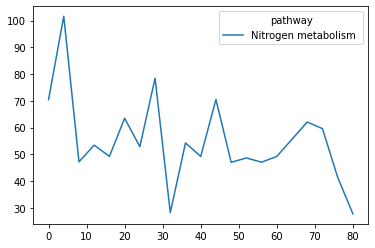

In [81]:
def get_gene_wanted(some_pathway):
    """This fucntion makes a plot of the pathway we choose"""

    ### find contigs with these annotations
    genes_wanted=gene_info_clean.loc[gene_info_clean['KEGG_clean']==some_pathway,].copy()

    #find the counts for the genes with the annotations we want
    counts_wanted=gene_counts.loc[gene_counts['CAMNT'].isin(genes_wanted.CAMNT)].copy()

    #add a column to our table
    counts_wanted['pathway']=some_pathway
    del counts_wanted['CAMNT']

    mean=counts_wanted.groupby('pathway').mean().transpose()
    return mean.plot()

    plt.close()

get_gene_wanted('Nitrogen metabolism ')

But we need to add an option to see the diel

<AxesSubplot:>

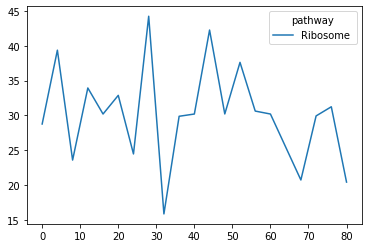

In [82]:
def get_gene_wanted(some_pathway, diel):

   ### find contigs with these annotations and the diel category wanted

    if diel== True:
        genes_wanted=gene_info_clean.loc[((gene_info_clean['KEGG_clean']==some_pathway) & (gene_info_clean['RAIN_diel_Results']==True)),].copy()
    elif diel == False:
        genes_wanted=gene_info_clean.loc[((gene_info_clean['KEGG_clean']==some_pathway) & (gene_info_clean['RAIN_diel_Results']==False)),].copy()
    else:
        genes_wanted=gene_info_clean.loc[gene_info_clean['KEGG_clean']==some_pathway,].copy()

    #find the counts for the genes with the annotations we want
    counts_wanted=gene_counts.loc[gene_counts['CAMNT'].isin(genes_wanted.CAMNT)].copy()

    #add a column to our table
    counts_wanted['pathway']=some_pathway
    del counts_wanted['CAMNT']

    #groupby the mean
    mean=counts_wanted.groupby('pathway').mean().transpose()
    return mean.plot()

    plt.close()

get_gene_wanted('Ribosome ', True)

let's add some shading so we can tell day and night apart

Photosynthesis 
pathway  Photosynthesis 
0              23.422535
4              87.281690
8             120.408451
12            103.830986
16             29.070423
20             15.830986
24             21.718310
28             85.197183
32             45.901408
36            151.507042
40             29.070423
44             22.309859
48             23.971831
52             66.028169
56            116.267606
60             29.070423
68             18.450704
72             25.647887
76             67.394366
80             96.140845


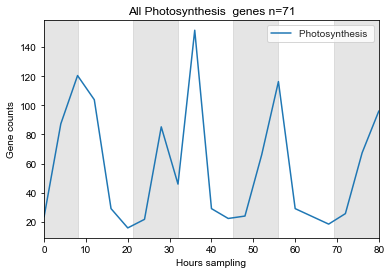

In [83]:
def get_gene_wanted(some_pathway, diel):

    ### find contigs with these annotations and the diel category wanted

    if diel== True:
        genes_wanted=gene_info_clean.loc[((gene_info_clean['KEGG_clean']==some_pathway) & (gene_info_clean['RAIN_diel_Results']==True)),].copy()
    elif diel == False:
        genes_wanted=gene_info_clean.loc[((gene_info_clean['KEGG_clean']==some_pathway) & (gene_info_clean['RAIN_diel_Results']==False)),].copy()
    else:
        genes_wanted=gene_info_clean.loc[gene_info_clean['KEGG_clean']==some_pathway,].copy()

    #find the counts for the genes with the annotations we want
    counts_wanted=gene_counts.loc[gene_counts['CAMNT'].isin(genes_wanted.CAMNT)].copy()

    #add a column to our table
    counts_wanted['pathway']=some_pathway
    del counts_wanted['CAMNT']

    mean=counts_wanted.groupby('pathway').mean().transpose()
    #return mean
  
    ###make my plot pretty
    fig, ax= plt.subplots()
    sns.set_style('white')
    print(some_pathway)
    print(mean)
    ax.plot(mean,label=some_pathway)
    plt.xlim(0,80)

    plt.axvspan(0, 8, alpha=.2, color='grey',zorder=1)
    plt.axvspan(21.25, 32, alpha=.2, color='grey',zorder=1)
    plt.axvspan(45.25, 56, alpha=.2, color='grey',zorder=1)
    plt.axvspan(69.25, 80, alpha=.2, color='grey',zorder=1)

    ax.set_title('{} {} genes n={}'.format(diel, some_pathway,counts_wanted.shape[0]))
    ax.set_xlabel('Hours sampling')
    ax.set_ylabel('Gene counts')
    plt.legend()

    plt.savefig(data_out_directory+'{}_{}.pdf'.format(some_pathway,diel))
    plt.show()
    plt.close()

get_gene_wanted('Photosynthesis ', 'All')


let's compare photosynthesis true, false and all

Photosynthesis 
pathway  Photosynthesis 
0              23.422535
4              87.281690
8             120.408451
12            103.830986
16             29.070423
20             15.830986
24             21.718310
28             85.197183
32             45.901408
36            151.507042
40             29.070423
44             22.309859
48             23.971831
52             66.028169
56            116.267606
60             29.070423
68             18.450704
72             25.647887
76             67.394366
80             96.140845


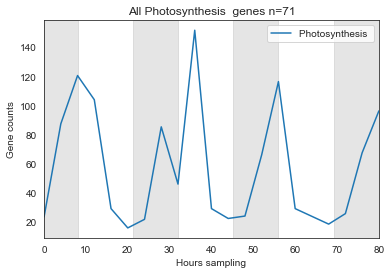

Photosynthesis 
pathway  Photosynthesis 
0              24.606557
4              98.491803
8             136.672131
12            117.295082
16             28.491803
20             16.442623
24             22.704918
28             95.967213
32             50.786885
36            173.016393
40             28.491803
44             22.639344
48             23.754098
52             73.606557
56            130.131148
60             28.491803
68             18.491803
72             25.983607
76             74.213115
80            108.950820


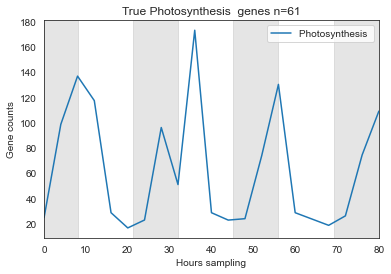

Photosynthesis 
pathway  Photosynthesis 
0                   16.2
4                   18.9
8                   21.2
12                  21.7
16                  32.6
20                  12.1
24                  15.7
28                  19.5
32                  16.1
36                  20.3
40                  32.6
44                  20.3
48                  25.3
52                  19.8
56                  31.7
60                  32.6
68                  18.2
72                  23.6
76                  25.8
80                  18.0


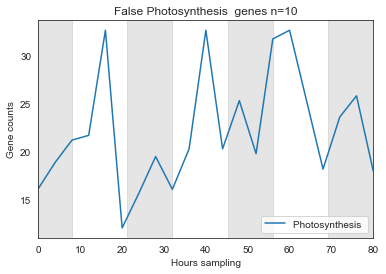

In [85]:
get_gene_wanted('Photosynthesis ', 'All')
get_gene_wanted('Photosynthesis ', True)
get_gene_wanted('Photosynthesis ', False)

As expected photosynthesis related genes show a diel pattern. The majority of the genes 61/71 are diel. When we look at the pattern of all the genes together we see that the diel genes dominate the patterns we see.

Let's check a set of genes we don't know much about and see what we learn

Nitrogen metabolism 
pathway  Nitrogen metabolism 
0                   70.411290
4                  101.604839
8                   47.161290
12                  53.419355
16                  49.193548
20                  63.475806
24                  52.830645
28                  78.451613
32                  28.185484
36                  54.225806
40                  49.193548
44                  70.491935
48                  46.967742
52                  48.620968
56                  47.032258
60                  49.193548
68                  62.048387
72                  59.564516
76                  41.362903
80                  27.693548


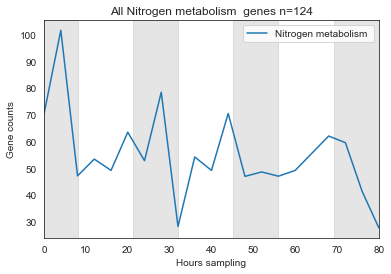

Nitrogen metabolism 
pathway  Nitrogen metabolism 
0                   97.166667
4                  137.944444
8                   58.833333
12                  70.638889
16                  64.444444
20                  93.555556
24                  77.250000
28                 104.000000
32                  28.527778
36                  69.638889
40                  64.444444
44                  95.361111
48                  63.083333
52                  63.388889
56                  57.638889
60                  64.444444
68                  87.916667
72                  84.333333
76                  52.638889
80                  29.722222


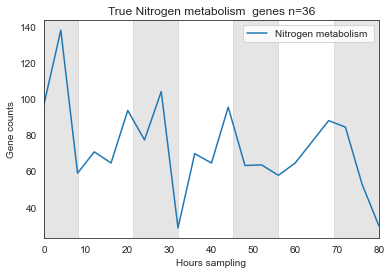

Nitrogen metabolism 
pathway  Nitrogen metabolism 
0                   59.465909
4                   86.738636
8                   42.386364
12                  46.375000
16                  42.954545
20                  51.170455
24                  42.840909
28                  68.000000
32                  28.045455
36                  47.920455
40                  42.954545
44                  60.318182
48                  40.375000
52                  42.579545
56                  42.693182
60                  42.954545
68                  51.465909
72                  49.431818
76                  36.750000
80                  26.863636


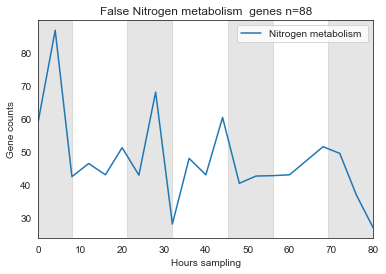

In [86]:
get_gene_wanted('Nitrogen metabolism ', 'All')
get_gene_wanted('Nitrogen metabolism ', True)
get_gene_wanted('Nitrogen metabolism ', False)

For genes related to nitrogen metabolism we see that the majority are not diel. This may suggest that given the low concentrations of nitrogen in the North Pacific Sunbtropical Gyre that the cells take up nitrogen whenever they can. 

# Homework

Can you make a function to print all three lines, (all, true, false) in one plot?

In [87]:
#### your work###
###Hint: use the skills you learned from Katie 
### hint: I already did most of the work for you so use the function I made as a spring board






### Answer

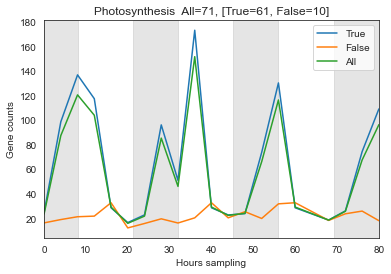

In [88]:
#### I will add on Fri morning :)

def get_gene_wanted(some_pathway):

    ### find contigs with these annotations and the diel category wanted

    #true
    genes_wanted_true=gene_info_clean.loc[((gene_info_clean['KEGG_clean']==some_pathway) & (gene_info_clean['RAIN_diel_Results']==True)),].copy()
    counts_wanted_true=gene_counts.loc[gene_counts['CAMNT'].isin(genes_wanted_true.CAMNT)].copy()
    counts_wanted_true['pathway']=some_pathway
    del counts_wanted_true['CAMNT']
    mean_true=counts_wanted_true.groupby('pathway').mean().transpose()

    ##counts for the label
    counts_true=counts_wanted_true.shape[0]

    #false
    genes_wanted_false=gene_info_clean.loc[((gene_info_clean['KEGG_clean']==some_pathway) & (gene_info_clean['RAIN_diel_Results']==False)),].copy()
    counts_wanted_false=gene_counts.loc[gene_counts['CAMNT'].isin(genes_wanted_false.CAMNT)].copy()
    counts_wanted_false['pathway']=some_pathway
    del counts_wanted_false['CAMNT']
    mean_false=counts_wanted_false.groupby('pathway').mean().transpose()

    ##counts for the label
    counts_false=counts_wanted_false.shape[0]

    #all
    genes_wanted_all=gene_info_clean.loc[gene_info_clean['KEGG_clean']==some_pathway,].copy()
    counts_wanted_all=gene_counts.loc[gene_counts['CAMNT'].isin(genes_wanted_all.CAMNT)].copy()
    counts_wanted_all['pathway']=some_pathway
    del counts_wanted_all['CAMNT']
    mean_all=counts_wanted_all.groupby('pathway').mean().transpose()

    ##counts for the label
    counts_all=counts_wanted_all.shape[0]
  
    ###make my plot pretty
    fig, ax= plt.subplots()
    sns.set_style('white')

    ax.plot(mean_true, label='True')
    ax.plot(mean_false, label='False')
    ax.plot(mean_all, label='All')
  
    ax.set_title('{} All={}, [True={}, False={}]'.format(some_pathway,counts_all,counts_true,counts_false))
    ax.set_xlabel('Hours sampling')
    ax.set_ylabel('Gene counts')
    ax.legend()  
  
    plt.xlim(0,80)
    plt.axvspan(0, 8, alpha=.2, color='grey',zorder=1)
    plt.axvspan(21.25, 32, alpha=.2, color='grey',zorder=1)
    plt.axvspan(45.25, 56, alpha=.2, color='grey',zorder=1)
    plt.axvspan(69.25, 80, alpha=.2, color='grey',zorder=1)
    plt.show()

    plt.close()

get_gene_wanted('Photosynthesis ')